In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats as stat

In [2]:
path = "/Users/jessraissouni/github/motorImagery/processed_data"
filelist = os.listdir(path)

In [3]:
for x, file in enumerate(filelist):
    print(x, file)

0 hand_Epochs_Img_gamma1.npy
1 hand_Epochs_Img_gamma2.npy
2 hand_Epochs_Overt_beta2.npy
3 hand_Epochs_Img_beta1.npy
4 Tng_Epochs_Img_gamma1.npy
5 Tng_Epochs_Overt_gamma1.npy
6 hand_Epochs_Overt_beta3.npy
7 hand_Epochs_Overt_beta1.npy
8 hand_Epochs_Img_beta2.npy
9 Tng_Epochs_Img_gamma2.npy
10 Tng_Epochs_Overt_gamma2.npy
11 hand_Epochs_Img_beta3.npy
12 hand_Epochs_Overt_gammaH.npy
13 hand_Epochs_Overt_gamma1.npy
14 hand_Epochs_Overt_gamma2.npy
15 Tng_Epochs_Img_gammaH.npy
16 Tng_Epochs_Overt_gammaH.npy
17 hand_Epochs_Img_gammaH.npy
18 Tng_Epochs_Img_beta3.npy
19 Tng_Epochs_Overt_beta1.npy
20 Tng_Epochs_Img_beta2.npy
21 Tng_Epochs_Overt_beta2.npy
22 Tng_Epochs_Overt_beta3.npy
23 Tng_Epochs_Img_beta1.npy


In [7]:
hand_overt_beta1 = np.load(path + '/' + filelist[7])
hand_overt_beta2 = np.load(path + '/' + filelist[2])
hand_overt_beta3 = np.load(path + '/' + filelist[6])
hand_overt_gamma1 = np.load(path + '/' + filelist[13])
hand_overt_gamma2 = np.load(path + '/' + filelist[14])
hand_overt_gammaH = np.load(path + '/' + filelist[12])

hand_imag_beta1 = np.load(path + '/' + filelist[3])
hand_imag_beta2 = np.load(path + '/' + filelist[8])
hand_imag_beta3 = np.load(path + '/' + filelist[11])
hand_imag_gamma1 = np.load(path + '/' + filelist[0])
hand_imag_gamma2 = np.load(path + '/' + filelist[1])
hand_imag_gammaH = np.load(path + '/' + filelist[17])

In [5]:
chans = [26, 27, 28, 35, 36] #specify hand channels with stimulation

In [8]:
handchans_hand_overt_beta1 = hand_overt_beta1[:,chans,:] #discard non-hand-specific channels
handchans_hand_overt_beta2 = hand_overt_beta2[:,chans,:]
handchans_hand_overt_beta3 = hand_overt_beta3[:,chans,:]
handchans_hand_overt_gamma1 = hand_overt_gamma1[:,chans,:]
handchans_hand_overt_gamma2 = hand_overt_gamma2[:,chans,:]
handchans_hand_overt_gammaH = hand_overt_gammaH[:,chans,:]

handchans_hand_imag_beta1 = hand_imag_beta1[:,chans,:]
handchans_hand_imag_beta2 = hand_imag_beta2[:,chans,:]
handchans_hand_imag_beta3 = hand_imag_beta3[:,chans,:]
handchans_hand_imag_gamma1 = hand_imag_gamma1[:,chans,:]
handchans_hand_imag_gamma2 = hand_imag_gamma2[:,chans,:]
handchans_hand_imag_gammaH = hand_imag_gammaH[:,chans,:]

In [9]:
handchansAvg_hand_overt_beta1 = np.mean(handchans_hand_overt_beta1, axis=1) # average across selected channels
handchansAvg_hand_overt_beta2 = np.mean(handchans_hand_overt_beta2, axis=1)
handchansAvg_hand_overt_beta3 = np.mean(handchans_hand_overt_beta3, axis=1)
handchansAvg_hand_overt_gamma1 = np.mean(handchans_hand_overt_gamma1, axis=1)
handchansAvg_hand_overt_gamma2 = np.mean(handchans_hand_overt_gamma2, axis=1)
handchansAvg_hand_overt_gammaH = np.mean(handchans_hand_overt_gammaH, axis=1)

handchansAvg_hand_imag_beta1 = np.mean(handchans_hand_imag_beta1, axis=1)
handchansAvg_hand_imag_beta2 = np.mean(handchans_hand_imag_beta2, axis=1)
handchansAvg_hand_imag_beta3 = np.mean(handchans_hand_imag_beta3, axis=1)
handchansAvg_hand_imag_gamma1 = np.mean(handchans_hand_imag_gamma1, axis=1)
handchansAvg_hand_imag_gamma2 = np.mean(handchans_hand_imag_gamma2, axis=1)
handchansAvg_hand_imag_gammaH = np.mean(handchans_hand_imag_gammaH, axis=1)

In [10]:
# extract beta1 and gammaH for each channel
#overt
hand1_beta1_overt = handchans_hand_overt_beta1[:,0,:]
hand1_gammaH_overt = handchans_hand_overt_gammaH[:,0,:]

hand2_beta1_overt = handchans_hand_overt_beta1[:,1,:]
hand2_gammaH_overt = handchans_hand_overt_gammaH[:,1,:]

hand3_beta1_overt = handchans_hand_overt_beta1[:,2,:]
hand3_gammaH_overt = handchans_hand_overt_gammaH[:,2,:]

hand4_beta1_overt = handchans_hand_overt_beta1[:,3,:]
hand4_gammaH_overt = handchans_hand_overt_gammaH[:,3,:]

hand5_beta1_overt = handchans_hand_overt_beta1[:,4,:]
hand5_gammaH_overt = handchans_hand_overt_gammaH[:,4,:]

#imagined
hand1_beta1_imag = handchans_hand_imag_beta1[:,0,:]
hand1_gammaH_imag = handchans_hand_imag_gammaH[:,0,:]

hand2_beta1_imag = handchans_hand_imag_beta1[:,1,:]
hand2_gammaH_imag = handchans_hand_imag_gammaH[:,1,:]

hand3_beta1_imag = handchans_hand_imag_beta1[:,2,:]
hand3_gammaH_imag = handchans_hand_imag_gammaH[:,2,:]

hand4_beta1_imag = handchans_hand_imag_beta1[:,3,:]
hand4_gammaH_imag = handchans_hand_imag_gammaH[:,3,:]

hand5_beta1_imag = handchans_hand_imag_beta1[:,4,:]
hand5_gammaH_imag = handchans_hand_imag_gammaH[:,4,:]

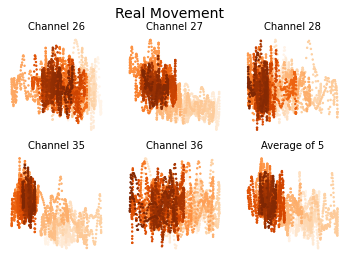

In [17]:
oranges = plt.cm.get_cmap('Oranges', 256)
z = oranges(np.linspace(0,1,4001))

fig, axs = plt.subplots(2, 3)

axs[0,0].scatter(np.mean(hand1_beta1_overt, axis=0), np.mean(hand1_gammaH_overt, axis=0), c=z, s=2)
axs[0,1].scatter(np.mean(hand2_beta1_overt, axis=0), np.mean(hand2_gammaH_overt, axis=0), c=z, s=2)
axs[0,2].scatter(np.mean(hand3_beta1_overt, axis=0), np.mean(hand3_gammaH_overt, axis=0), c=z, s=2)
axs[1,0].scatter(np.mean(hand4_beta1_overt, axis=0), np.mean(hand4_gammaH_overt, axis=0), c=z, s=2)
axs[1,1].scatter(np.mean(hand5_beta1_overt, axis=0), np.mean(hand5_gammaH_overt, axis=0), c=z, s=2)
axs[1,2].scatter(np.mean(handchansAvg_hand_overt_beta1, axis=0), np.mean(handchansAvg_hand_overt_gammaH, axis=0), c=z, s=2)

fig.suptitle("Real Movement", fontsize=14)
axs[0,0].set_title("Channel 26", fontsize=10)
axs[0,1].set_title("Channel 27", fontsize=10)
axs[0,2].set_title("Channel 28", fontsize=10)
axs[1,0].set_title("Channel 35", fontsize=10)
axs[1,1].set_title("Channel 36", fontsize=10)
axs[1,2].set_title("Average of 5", fontsize=10)

axs[0,0].set_axis_off()
axs[0,1].set_axis_off()
axs[0,2].set_axis_off()
axs[1,0].set_axis_off()
axs[1,1].set_axis_off()
axs[1,2].set_axis_off()

plt.show()

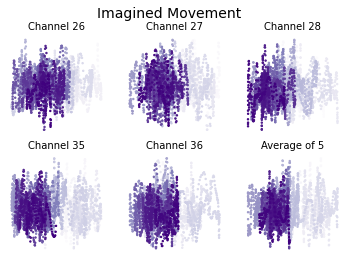

In [18]:
purples = plt.cm.get_cmap('Purples', 256)
w = purples(np.linspace(0,1,4001))

fig, axs = plt.subplots(2, 3)

axs[0,0].scatter(np.mean(hand1_beta1_imag, axis=0), np.mean(hand1_gammaH_imag, axis=0), c=w, s=2)
axs[0,1].scatter(np.mean(hand2_beta1_imag, axis=0), np.mean(hand2_gammaH_imag, axis=0), c=w, s=2)
axs[0,2].scatter(np.mean(hand3_beta1_imag, axis=0), np.mean(hand3_gammaH_imag, axis=0), c=w, s=2)
axs[1,0].scatter(np.mean(hand4_beta1_imag, axis=0), np.mean(hand4_gammaH_imag, axis=0), c=w, s=2)
axs[1,1].scatter(np.mean(hand5_beta1_imag, axis=0), np.mean(hand5_gammaH_imag, axis=0), c=w, s=2)
axs[1,2].scatter(np.mean(handchansAvg_hand_imag_beta1, axis=0), np.mean(handchansAvg_hand_imag_gammaH, axis=0), c=w, s=2)

fig.suptitle("Imagined Movement", fontsize=14)
axs[0,0].set_title("Channel 26", fontsize=10)
axs[0,1].set_title("Channel 27", fontsize=10)
axs[0,2].set_title("Channel 28", fontsize=10)
axs[1,0].set_title("Channel 35", fontsize=10)
axs[1,1].set_title("Channel 36", fontsize=10)
axs[1,2].set_title("Average of 5", fontsize=10)

axs[0,0].set_axis_off()
axs[0,1].set_axis_off()
axs[0,2].set_axis_off()
axs[1,0].set_axis_off()
axs[1,1].set_axis_off()
axs[1,2].set_axis_off()

plt.show()

In [ ]:
avgAcrossTrials_hand_overt_beta1 = np.mean(handchansAvg_hand_overt_beta1, axis=0) #average across trials as baseline for variance comparison
avgAcrossTrials_hand_overt_beta2 = np.mean(handchansAvg_hand_overt_beta2, axis=0)
avgAcrossTrials_hand_overt_beta3 = np.mean(handchansAvg_hand_overt_beta3, axis=0)
avgAcrossTrials_hand_overt_gamma1 = np.mean(handchansAvg_hand_overt_gamma1, axis=0)
avgAcrossTrials_hand_overt_gamma2 = np.mean(handchansAvg_hand_overt_gamma2, axis=0)
avgAcrossTrials_hand_overt_gammaH = np.mean(handchansAvg_hand_overt_gammaH, axis=0)

In [ ]:
def compute_erserd(handchansAvg, avgAcrossTrials):
    
    #inputs
    #handchansAvg: array (epochs x timepoints)
    #avgAcrossTrials: baseline for comparing each epoch (1D array of timepoints)
    
    #outputs
    #erserd: averaged variance for frequency band

    trialvar = np.zeros((np.shape(handchansAvg)[0], np.shape(handchansAvg)[1]))
    for i in range(len(handchansAvg[:,1])):
        trialdat = (handchansAvg[i,:] - avgAcrossTrials)**2
        trialvar[i,:] = trialdat


    erserd = np.mean(trialvar, axis=0)

    return erserd

In [ ]:
#computer erserd for each frequency band
erserd_beta1 = compute_erserd(handchansAvg_hand_overt_beta1, avgAcrossTrials_hand_overt_beta1)
erserd_beta2 = compute_erserd(handchansAvg_hand_overt_beta2, avgAcrossTrials_hand_overt_beta2)
erserd_beta3 = compute_erserd(handchansAvg_hand_overt_beta3, avgAcrossTrials_hand_overt_beta3)
erserd_gamma1 = compute_erserd(handchansAvg_hand_overt_gamma1, avgAcrossTrials_hand_overt_gamma1)
erserd_gamma2 = compute_erserd(handchansAvg_hand_overt_gamma2, avgAcrossTrials_hand_overt_gamma2)
erserd_gammaH = compute_erserd(handchansAvg_hand_overt_gammaH, avgAcrossTrials_hand_overt_gammaH)

In [ ]:
# make data
x = np.arange(0, 10, .1)
y = 4 + 2 * np.sin(2 * x)

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [ ]:
plotdat = np.zeros((6, 4001))

plotdat[0,:] = erserd_beta1
plotdat[1,:] = erserd_beta2
plotdat[2,:] = erserd_beta3
plotdat[3,:] = erserd_gamma1
plotdat[4,:] = erserd_gamma2
plotdat[5,:] = erserd_gammaH

In [ ]:
fig, ax = plt.subplots()

ax.pcolormesh(plotdat)

plt.show()

In [ ]:
sustained = np.random.normal(loc=0, scale=1.0, size=(1,6))*2
dynamic = np.random.normal(loc=0, scale=1.0, size=(1,6))*2

plt.style.use('seaborn-white')
fig, ax = plt.subplots()
ax.hlines(y=range(6), xmin=np.minimum(sustained,dynamic)+0.1, xmax=np.maximum(sustained,dynamic)-0.1, linewidth=2, colors='0.8', alpha=0.5)
plt.axvline(x=0, ls=':')
ax.scatter(sustained, range(6), s=200, alpha=1, label='sustained')
ax.scatter(dynamic, range(6), s=200, alpha=1, label='dynamic')
fig.suptitle("S1 - Hand", fontsize=18)
plt.title("Correlation Between Simulated Movement and Phase Amplitude", fontsize=12)
plt.xlabel("Correlation Z-Score", fontsize=16)
plt.ylabel("Frequency Band", fontsize=16)
ax.set_yticks([0,1,2,3,4,5])
ax.set_yticklabels([str(chr(946)+'1'), str(chr(946)+'2'), str(chr(946)+'3'), str(chr(947)+'1'), str(chr(947)+'2'), str(chr(947)+'H')])
ax.legend()
plt.show()

In [ ]:
pad = np.arange(0,250)
x = np.linspace(0,(6*np.radians(180)),(180*6))
y = np.sin(x)
plt.plot(x, y)